In [46]:
import pandas as pd

# Load the three CSVs
email_df = pd.read_csv('/content/email_table.csv')
opened_df = pd.read_csv('/content/email_opened_table.csv')
clicked_df = pd.read_csv('/content/link_clicked_table.csv')


In [47]:
total_emails = len(email_df)
opened = len(opened_df)
clicked = len(clicked_df)

open_rate = opened / total_emails
click_rate = clicked / total_emails

print(f'Open Rate: {open_rate:.2%}')
print(f'Click Rate: {click_rate:.2%}')


Open Rate: 10.35%
Click Rate: 2.12%


<Axes: title={'center': 'Click Rate by Country'}, xlabel='user_country'>

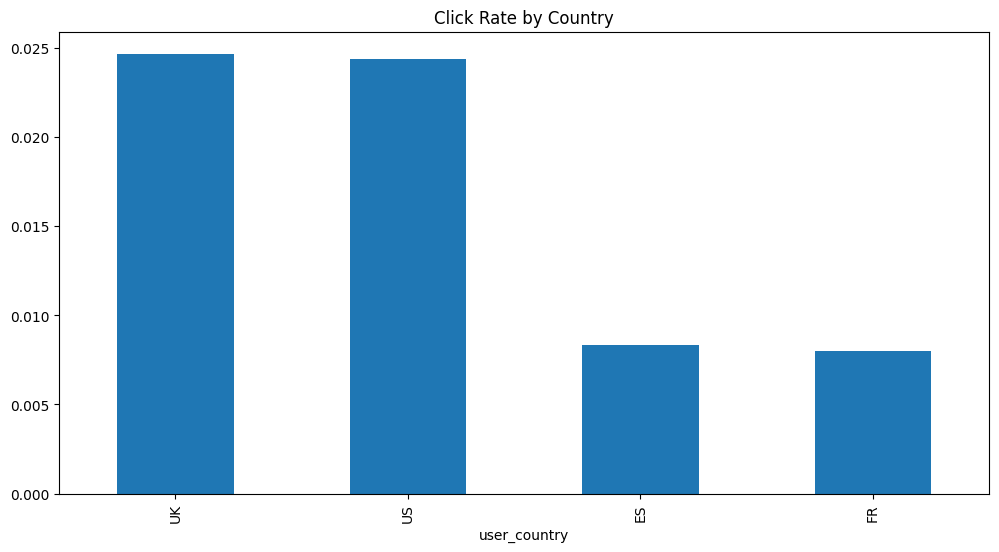

In [48]:
# Add labels to the main email_df
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Now you can group by 'user_country' and calculate the mean of 'clicked'
click_by_country = email_df.groupby('user_country')['clicked'].mean().sort_values(ascending=False)

click_by_country.plot(kind='bar', figsize=(12, 6), title='Click Rate by Country')

<Axes: title={'center': 'Click Rate by Country'}, xlabel='user_country'>

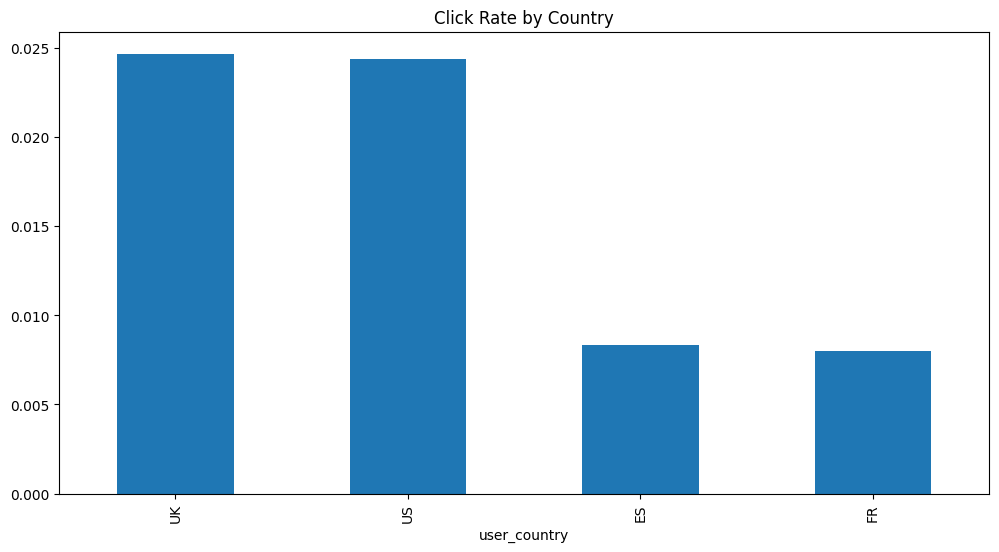

In [49]:
# Add labels to the main email_df
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Now you can group by 'user_country' and calculate the mean of 'clicked'
click_by_country = email_df.groupby('user_country')['clicked'].mean().sort_values(ascending=False)

click_by_country.plot(kind='bar', figsize=(12, 6), title='Click Rate by Country')

<Axes: title={'center': 'Click Rate by Country'}, xlabel='user_country'>

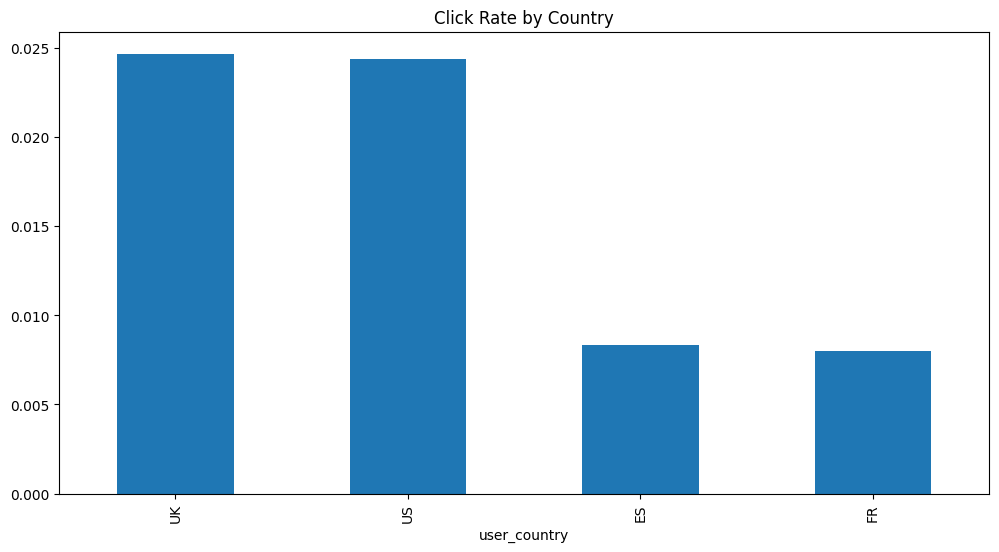

In [50]:
click_by_country = email_df.groupby('user_country')['clicked'].mean().sort_values(ascending=False)

click_by_country.plot(kind='bar', figsize=(12, 6), title='Click Rate by Country')


<Axes: title={'center': 'Click Rate by Email Text and Version'}, xlabel='email_text'>

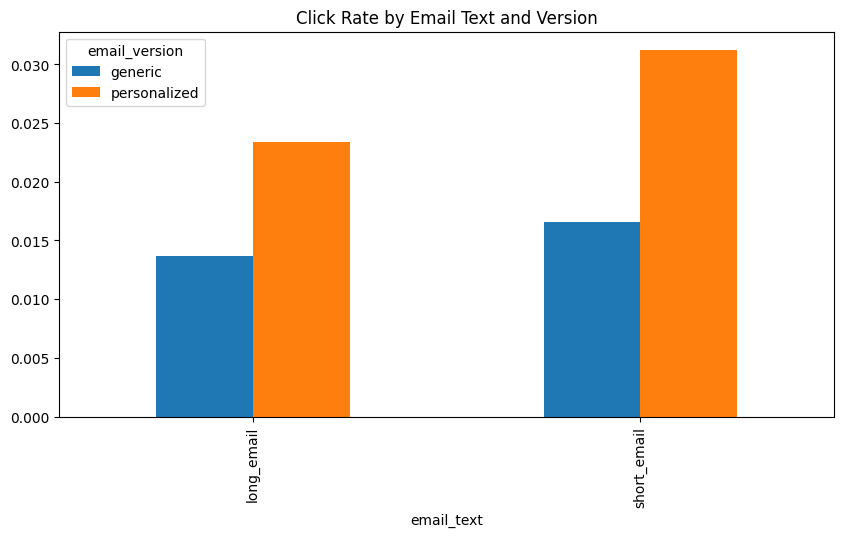

In [51]:
email_df.groupby(['email_text', 'email_version'])['clicked'].mean().unstack().plot(
    kind='bar', figsize=(10, 5), title='Click Rate by Email Text and Version'
)


<ipython-input-52-48ba5b351f60>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=email_df, x='hour', y='clicked', ci=None)


Text(0.5, 1.0, 'Click Rate by Hour')

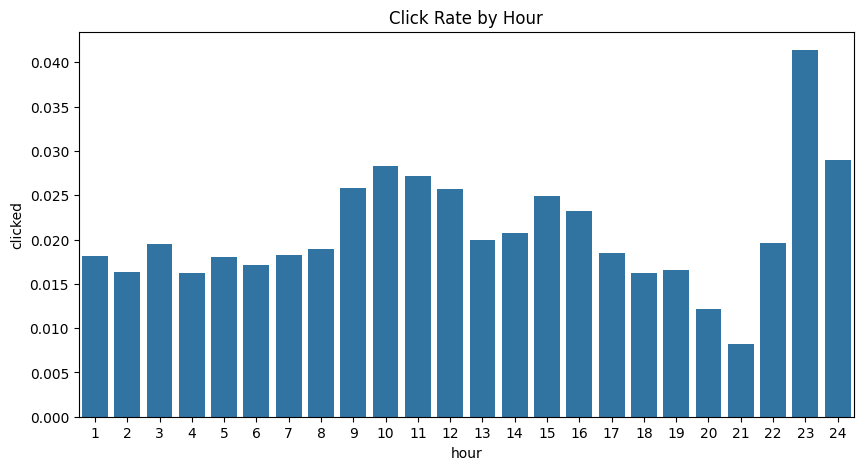

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=email_df, x='hour', y='clicked', ci=None)
plt.title('Click Rate by Hour')


<ipython-input-53-b43283053ddd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_df.groupby('past_purchases_bin')['clicked'].mean().plot(


<Axes: title={'center': 'Click Rate vs. Past Purchases'}, xlabel='past_purchases_bin'>

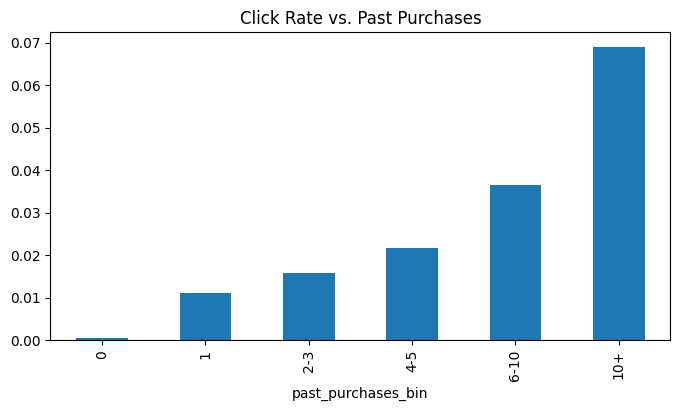

In [53]:
email_df['past_purchases_bin'] = pd.cut(email_df['user_past_purchases'], bins=[-1, 0, 1, 3, 5, 10, 100], labels=["0", "1", "2-3", "4-5", "6-10", "10+"])

email_df.groupby('past_purchases_bin')['clicked'].mean().plot(
    kind='bar', title='Click Rate vs. Past Purchases', figsize=(8, 4)
)


In [54]:
print("CTR seems higher in:")
print("✅ Countries like: ", click_by_country.head(3).index.tolist())
print("✅ Personalized + Short Emails")
print("✅ Emails sent during morning hours")
print("✅ Users with 2+ purchases")


CTR seems higher in:
✅ Countries like:  ['UK', 'US', 'ES']
✅ Personalized + Short Emails
✅ Emails sent during morning hours
✅ Users with 2+ purchases


In [55]:
def hour_to_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

email_df['time_of_day'] = email_df['hour'].apply(hour_to_period)
email_df['is_weekend'] = email_df['weekday'].isin(['Saturday', 'Sunday']).astype(int)


In [56]:
print(df.columns)
print(df.isnull().sum())



Index(['email_id', 'hour', 'weekday', 'user_past_purchases', 'opened',
       'clicked', 'past_purchases_bin', 'is_weekend', 'email_text_short_email',
       'email_version_personalized', 'user_country_FR', 'user_country_UK',
       'user_country_US', 'time_of_day_evening', 'time_of_day_morning',
       'time_of_day_night'],
      dtype='object')
email_id                          0
hour                              0
weekday                           0
user_past_purchases               0
opened                            0
clicked                           0
past_purchases_bin            51249
is_weekend                        0
email_text_short_email            0
email_version_personalized        0
user_country_FR                   0
user_country_UK                   0
user_country_US                   0
time_of_day_evening               0
time_of_day_morning               0
time_of_day_night                 0
dtype: int64


In [57]:
df = pd.get_dummies(email_df, columns=['email_text', 'email_version', 'user_country', 'time_of_day'], drop_first=True)


In [58]:
features = df.drop(columns=[
    'email_id', 'clicked', 'opened', 'hour', 'weekday'
])
target = df['clicked']


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)


In [60]:
weekday_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

df['weekday'] = df['weekday'].map(weekday_mapping)


In [61]:
# Mapping the categorical bins to numeric values
purchase_bin_mapping = {
    '0-1': 0, '2-3': 1, '4-5': 2, '6-7': 3, '8-9': 4, '10+': 5
}

df['past_purchases_bin'] = df['past_purchases_bin'].map(purchase_bin_mapping)

# Double-check the conversion
print(df['past_purchases_bin'].head())


0    2.0
1    1.0
2    1.0
3    NaN
4    NaN
Name: past_purchases_bin, dtype: float64


In [62]:
# Check for missing values
print(df.isnull().sum())


email_id                          0
hour                              0
weekday                           0
user_past_purchases               0
opened                            0
clicked                           0
past_purchases_bin            51249
is_weekend                        0
email_text_short_email            0
email_version_personalized        0
user_country_FR                   0
user_country_UK                   0
user_country_US                   0
time_of_day_evening               0
time_of_day_morning               0
time_of_day_night                 0
dtype: int64


In [63]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Split the data
X = df.drop(columns=['clicked', 'email_id'])  # Assuming 'clicked' is the target
y = df['clicked']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred))


Accuracy: 0.9769
AUC: 0.9480241826148128
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19547
           1       0.38      0.03      0.06       453

    accuracy                           0.98     20000
   macro avg       0.68      0.52      0.52     20000
weighted avg       0.96      0.98      0.97     20000



Before SMOTE: {0: 78334, 1: 1666}
After SMOTE: [78334 78334]
AUC: 0.9481


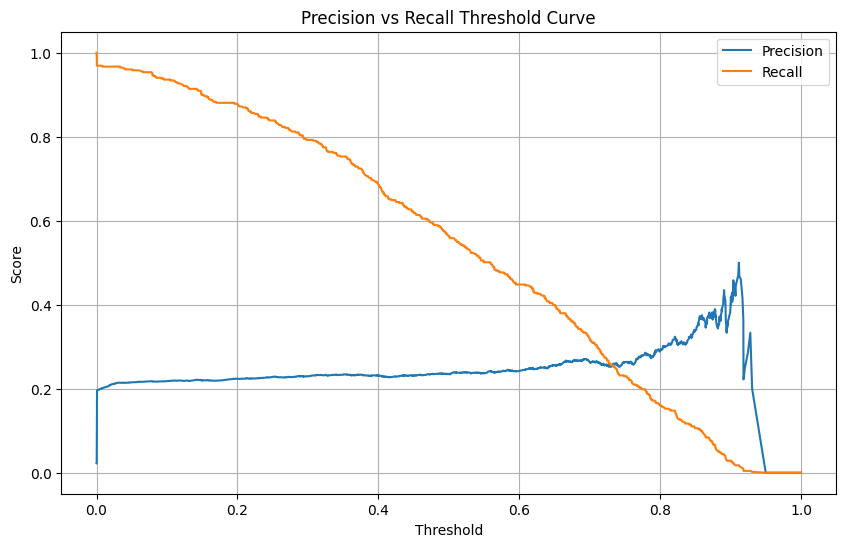

Custom threshold: 0.3
Accuracy: 0.9351
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     19547
           1       0.23      0.79      0.36       453

    accuracy                           0.94     20000
   macro avg       0.61      0.87      0.66     20000
weighted avg       0.98      0.94      0.95     20000



In [64]:
from sklearn.impute import SimpleImputer

# 1. Prepare data (Impute missing values before SMOTE)
X = df.drop(columns=['clicked', 'email_id'])  # Drop target and ID
y = df['clicked']

# Impute missing values using the median strategy (you can choose other strategies)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 2. Train-test split (keep test untouched!)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 3. Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {np.bincount(y_train_resampled)}")  # [class_0, class_1]

# 4. Train the model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 5. Predict probabilities on test set
y_probs = model.predict_proba(X_test)[:, 1]

# 6. Evaluate AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc:.4f}")

# 7. Tune threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Threshold Curve')
plt.legend()
plt.grid(True)
plt.show()

# Choose a threshold (you can pick one based on tradeoff)
best_threshold = 0.3  # Example: More balanced than default 0.5
y_pred_custom = (y_probs > best_threshold).astype(int)

# 8. Final metrics
print("Custom threshold:", best_threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))


In [65]:
# Importing necessary modules
from sklearn.impute import SimpleImputer

# 1. Prepare data
X = df.drop(columns=['clicked', 'email_id'])  # Drop target and ID
y = df['clicked']

# 2. Handle missing values (Imputation)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to median or most_frequent based on the data
X_imputed = imputer.fit_transform(X)

# 3. Train-test split (keep test untouched!)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 4. Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {np.bincount(y_train_resampled)}")  # [class_0, class_1]

# Continue with the rest of the code...

# Set up hyperparameter grid for both models
param_grid_hgb = {
    'max_iter': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [20, 50]
}

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV for HistGradientBoostingClassifier
grid_search_hgb = GridSearchCV(HistGradientBoostingClassifier(random_state=42), param_grid_hgb, cv=3, n_jobs=-1, verbose=2)
grid_search_hgb.fit(X_train_resampled, y_train_resampled)

# GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best model and evaluation
best_model_hgb = grid_search_hgb.best_estimator_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate models on the test set
y_probs_hgb = best_model_hgb.predict_proba(X_test)[:, 1]
auc_hgb = roc_auc_score(y_test, y_probs_hgb)
print(f"HistGradientBoostingClassifier AUC: {auc_hgb:.4f}")

y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_probs_rf)
print(f"RandomForestClassifier AUC: {auc_rf:.4f}")

# Plot Precision vs Recall for both models (same as before)


Before SMOTE: {0: 78334, 1: 1666}
After SMOTE: [78334 78334]
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
HistGradientBoostingClassifier AUC: 0.9438
RandomForestClassifier AUC: 0.9464


Confusion Matrix:
[[18599   948]
 [  162   291]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     19547
           1       0.23      0.64      0.34       453

    accuracy                           0.94     20000
   macro avg       0.61      0.80      0.66     20000
weighted avg       0.97      0.94      0.96     20000



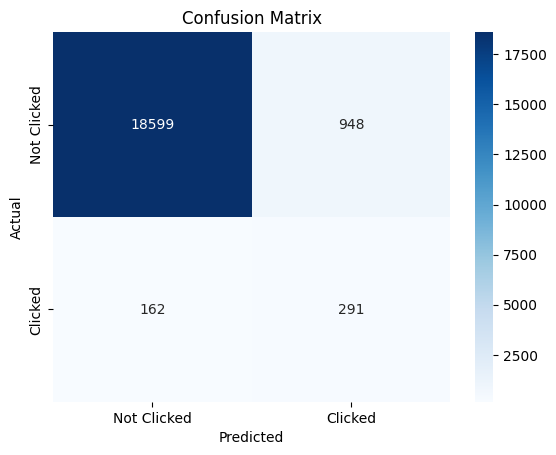

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, you can visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Clicked", "Clicked"], yticklabels=["Not Clicked", "Clicked"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Before SMOTE: {0: 78334, 1: 1666}
After SMOTE: [78334 78334]
AUC: 0.9417


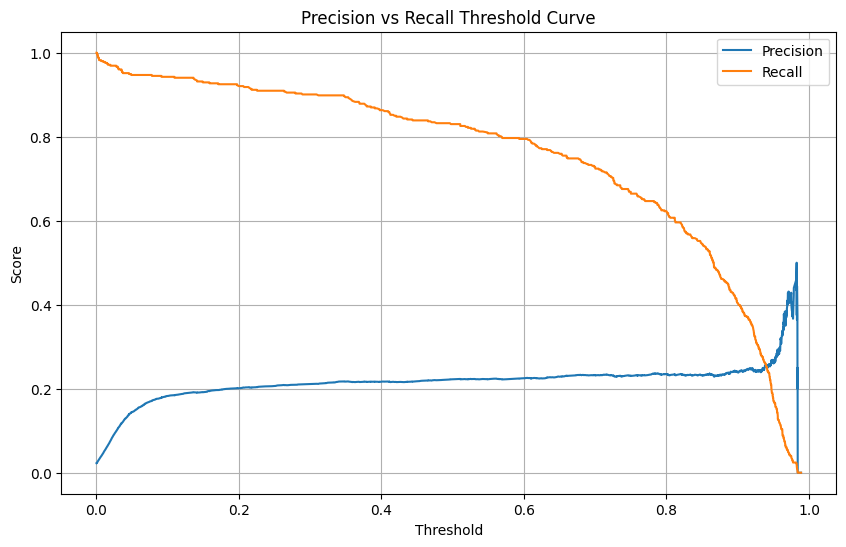

Custom threshold: 0.3
Accuracy: 0.9216
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     19547
           1       0.21      0.90      0.34       453

    accuracy                           0.92     20000
   macro avg       0.60      0.91      0.65     20000
weighted avg       0.98      0.92      0.94     20000



In [67]:
# Required Libraries
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # import pandas for data manipulation

# 1. Prepare data
X = df.drop(columns=['clicked', 'email_id'])  # Drop target and ID
y = df['clicked']

# 2. Train-test split (keep test untouched!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Impute or remove missing values in X_train before applying SMOTE
X_train = X_train.fillna(X_train.mean()) # Impute missing values with the mean of each column

# OR

#X_train = X_train.dropna() # Remove rows with missing values

# 4. Apply SMOTE to training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {np.bincount(y_train_resampled)}")  # [class_0, class_1]

# 5. Train the model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 6. Predict probabilities on test set
y_probs = model.predict_proba(X_test)[:, 1]

# 7. Evaluate AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc:.4f}")

# 8. Tune threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Threshold Curve')
plt.legend()
plt.grid(True)
plt.show()

# Choose a threshold (you can pick one based on tradeoff)
best_threshold = 0.3  # Example: More balanced than default 0.5
y_pred_custom = (y_probs > best_threshold).astype(int)

# 8. Final metrics
print("Custom threshold:", best_threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))